In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [34]:
featureName = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target', 'thal']
df = pd.read_csv('data/heart+disease/processed_cleveland.csv', header=None, names=featureName, index_col=False, delimiter=',')
df.head()

/tmp/ipykernel_27031/56072688.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('data/heart+disease/processed_cleveland.csv', header=None, names=featureName, index_col=False, delimiter=',')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [35]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,thal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0


In [36]:
df.shape

(303, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  ca        303 non-null    float64
 11  target    303 non-null    object 
 12  thal      303 non-null    object 
dtypes: float64(11), object(2)
memory usage: 30.9+ KB


In [38]:
df.replace('?', np.nan, inplace=True)

In [39]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
target      4
thal        2
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.duplicated().sum()

0

In [42]:
print(df['target'].unique())
print(df['thal'].unique())

['0.0' '3.0' '2.0' '1.0']
['6.0' '3.0' '7.0']


In [44]:
indicators = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca']]

Text(0.5, 1.0, 'Correlation Heatmap without Categorical Variables')

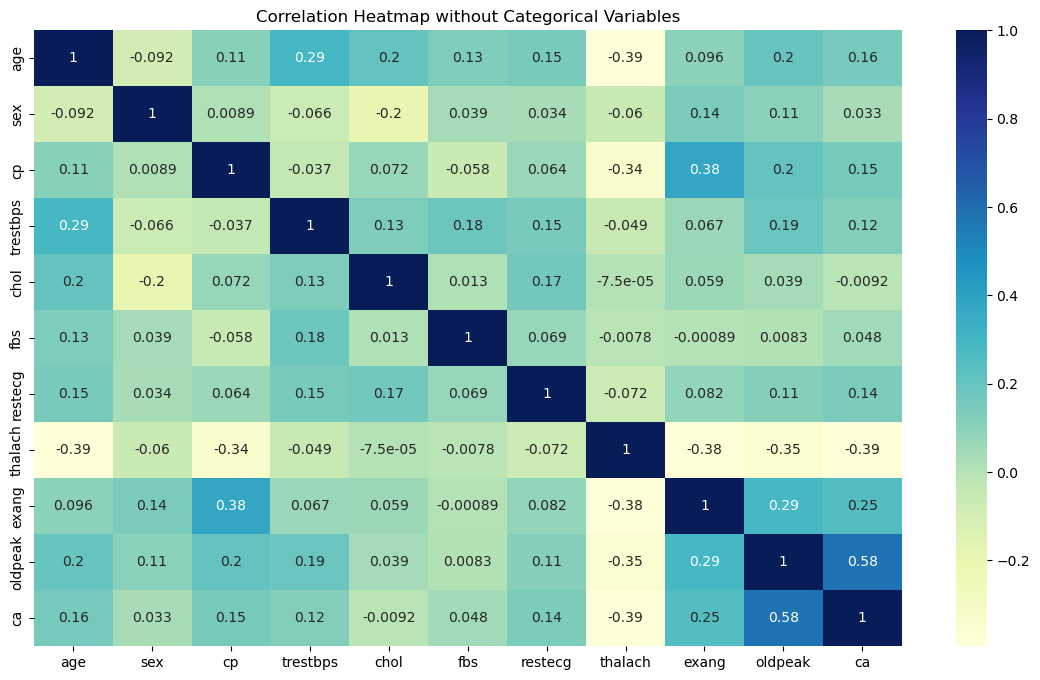

In [45]:
plt.figure(figsize=(14, 8))
sns.heatmap(indicators.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap without Categorical Variables')

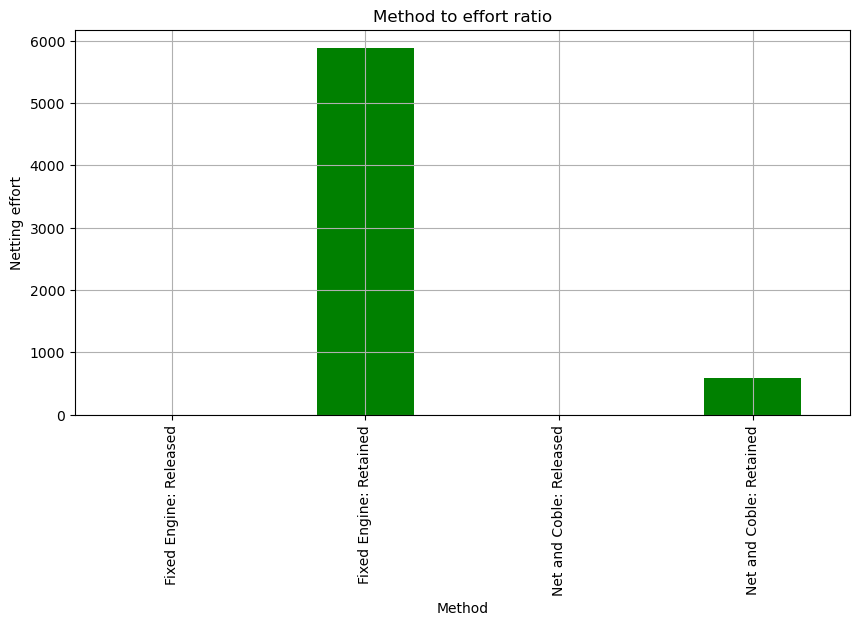

In [ ]:
plt.figure(figsize=(10, 5))
method_effort.plot(kind='bar', color='green')
plt.title('Method to effort ratio')
plt.xlabel('Method')
plt.ylabel('Netting effort')
plt.xticks(rotation=90)
plt.grid(True);

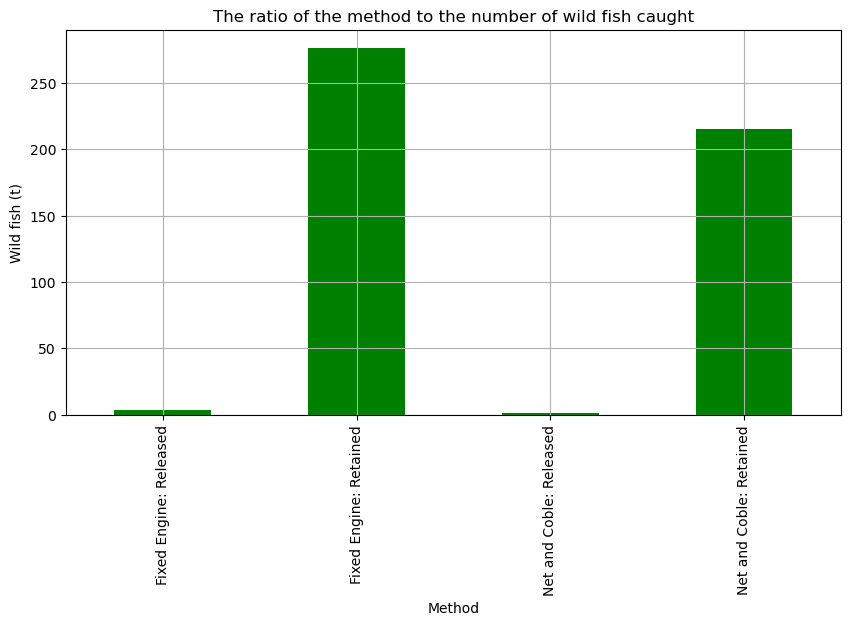

In [ ]:
plt.figure(figsize=(10, 5))
method_wild_fish.plot(kind='bar', color='green')
plt.title('The ratio of the method to the number of wild fish caught')
plt.xlabel('Method')
plt.ylabel('Wild fish (t)')
plt.xticks(rotation=90)
plt.grid(True);

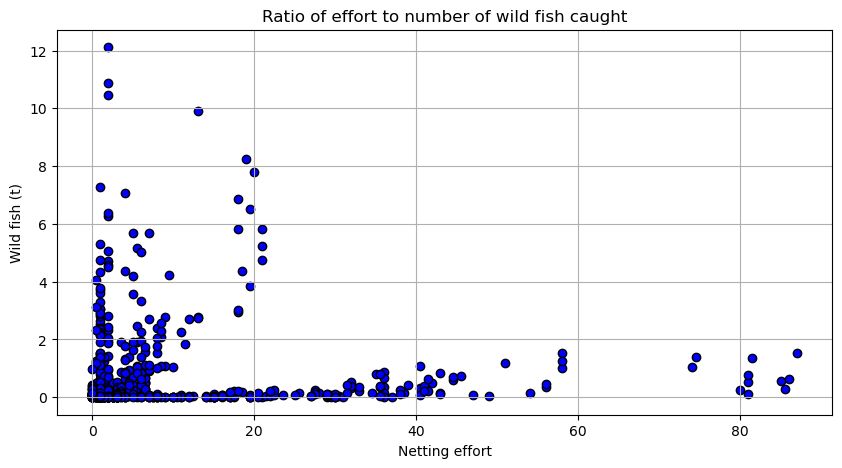

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Netting effort'], df['Wild fish (t)'], color='blue', edgecolor='black', linewidth=1)
plt.title('Ratio of effort to number of wild fish caught')
plt.xlabel('Netting effort')
plt.ylabel('Wild fish (t)')
plt.grid(True) 

In [ ]:
df.columns

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort', 'Wild MSW weight (t)',
       'Wild 1SW weight (t)', 'Sea trout weight (t)', 'Finnock weight (t)',
       'Wild fish (t)', 'Farmed MSW weight (t)', 'Farmed 1SW weight (t)',
       'Farmed fish (t)'],
      dtype='object')

In [ ]:
df['Wild 1SW weight (t)'] = df['Wild 1SW weight (t)'].astype('int64')
df['Wild MSW weight (t)'] = df['Wild MSW weight (t)'].astype('int64')
# df['Sea trout weight (t)'] = df['Sea trout weight (t)'].astype('int64')
# df['Finnock weight (t)'] = df['Finnock weight (t)'].astype('int64')
X = df[['Wild MSW weight (t)', 'Wild 1SW weight (t)']]
X

,Wild MSW weight (t),Wild 1SW weight (t)
815,0,0
816,0,0
817,0,0
818,0,0
819,0,0
...,...,...
23132,0,0
23133,0,0
23134,0,0
23135,0,0


In [ ]:
df['Wild fish (t)'] = df['Wild fish (t)'].astype('int64')
y = df['Wild fish (t)']
# pd.cut(y, bins = 289, labels=np.arange(289), right=False)
# y = np.digitize(y, np.arrange())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
# model.score(X_test, y_test)

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# mse

In [ ]:
# mae = mean_absolute_error(y_test, y_pred)
# mae

In [ ]:
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
# RMSE